## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

What is your research question? What problem is it that you are trying to solve?

### b) Defining the Metric for Success

What will convince you that your project has succeeded?

### c) Understanding the context 

The background information surrounding the problem or research question.

### d) Recording the Experimental Design

The steps you will take from the beginning to the end of this project.

### e) Data Relevance

Is your data relevant to the problem or research question?

## <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [ ]:
# load libraries
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load and preview dataset
# diabetes = pd.read_csv('https://bit.ly/3eoAbDS')
diabetes_df = pd.read_csv('/content/diabetes.csv')
diabetes_df.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
590,11,111,84,40,0,46.8,0.925,45,1
334,1,95,60,18,58,23.9,0.260,22,0
630,7,114,64,0,0,27.4,0.732,34,1


In [ ]:
# preview dataset shape

diabetes_df.shape

(768, 9)

In [ ]:
# look for duplicates
diabetes = diabetes_df[diabetes_df.duplicated()]
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [ ]:
# look for missing records

diabetes_df.isnull()
# Get no of missing records
n0_of_missing = diabetes_df.isnull().sum()
n0_of_missing

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# preview datatypes
diabetes_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
# check for outliers
Q1 = diabetes_df.quantile(0.25)
Q3 = diabetes_df.quantile(0.75)
IQR = Q3 - Q1
IQR

# filter out our outliers by getting values which are outside our IQR Range.
outliers_df_iqr = diabetes_df[((diabetes_df < (Q1 - 1.5 * IQR)) | (diabetes_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Checking the size of the dataset with outliers for cleaning purposes
outliers_df_iqr.shape

# Preview Outliers
outliers_df_iqr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
12,10,139,80,0,0,27.1,1.441,57,0
...,...,...,...,...,...,...,...,...,...
706,10,115,0,0,0,0.0,0.261,30,1
707,2,127,46,21,335,34.4,0.176,22,0
710,3,158,64,13,387,31.2,0.295,24,0
715,7,187,50,33,392,33.9,0.826,34,1


## <font color='#2F4F4F'>3. Data Analysis</font>

### 3.1 General Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


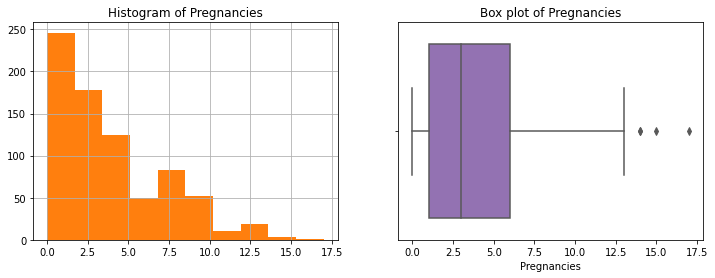

In [ ]:
# distribution of Pregnancies
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

plt.subplot(1, 2, 1)
diabetes_df.Pregnancies.hist(color = '#ff7f0e')
plt.title('Histogram of Pregnancies')

plt.subplot(1, 2, 2)
sns.boxplot(diabetes_df.Pregnancies, color = '#9467bd')
plt.title('Box plot of Pregnancies')

plt.show()

In [ ]:
# summary statistics of Pregnancies
diabetes.Pregnancies.describe()

What do you observe about the Pregnancies variable?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


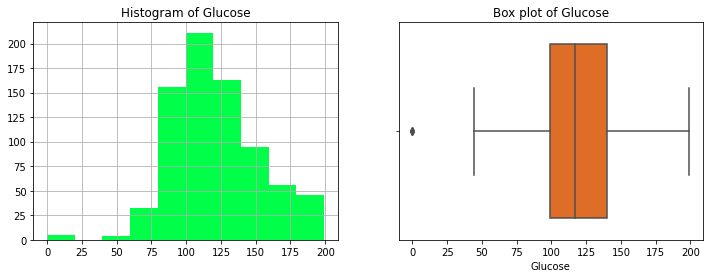

In [ ]:
# distribution of Glucose

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

plt.subplot(1, 2, 1)
diabetes_df.Glucose.hist(color = '#00ff48')
plt.title('Histogram of Glucose')

plt.subplot(1, 2, 2)
sns.boxplot(diabetes_df.Glucose, color = '#fc660a')
plt.title('Box plot of Glucose')

plt.show()

In [ ]:
# summary statistics of Glucose

df_glucose = diabetes_df["Glucose"]
df_glucose.describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

What do you observe about the Glucose variable?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


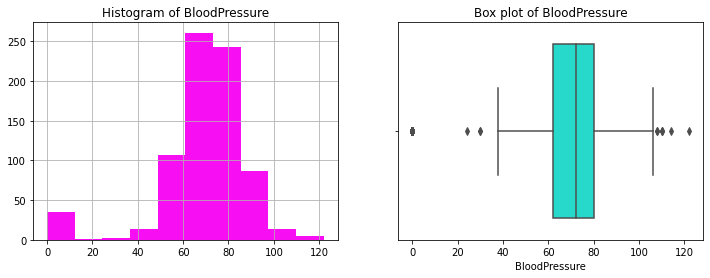

In [ ]:
# distribution of BloodPressure

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

plt.subplot(1, 2, 1)
diabetes_df.BloodPressure.hist(color = '#f70ef3')
plt.title('Histogram of BloodPressure')

plt.subplot(1, 2, 2)
sns.boxplot(diabetes_df.BloodPressure, color = '#09f7e3')
plt.title('Box plot of BloodPressure')

plt.show()



In [ ]:
# summary statistics of BloodPressure

df_BP = diabetes_df["BloodPressure"]
df_BP.describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

Note your observations.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


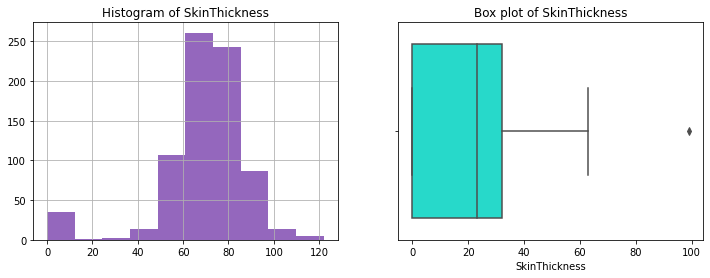

In [ ]:
# distribution of SkinThickness
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

plt.subplot(1, 2, 1)
diabetes_df.BloodPressure.hist(color = '#9467bd')
plt.title('Histogram of SkinThickness')

plt.subplot(1, 2, 2)
sns.boxplot(diabetes_df.SkinThickness, color = '#09f7e3')
plt.title('Box plot of SkinThickness')

plt.show()



In [ ]:
# summary statistics of SkinThickness

df_Skin = diabetes_df["SkinThickness"]
df_Skin.describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

Note your observations.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


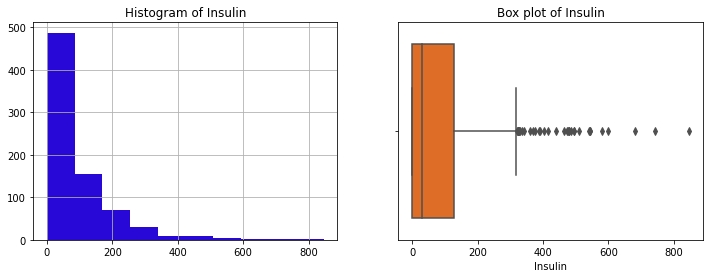

In [ ]:
# distribution of Insulin


fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

plt.subplot(1, 2, 1)
diabetes_df.Insulin.hist(color = '#2708d6')
plt.title('Histogram of Insulin')

plt.subplot(1, 2, 2)
sns.boxplot(diabetes_df.Insulin, color = '#fc660a')
plt.title('Box plot of Insulin')

plt.show()

In [ ]:
# summary statistics of Insulin
df_insulin = diabetes_df["Insulin"]
df_insulin.describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

Note your observations.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


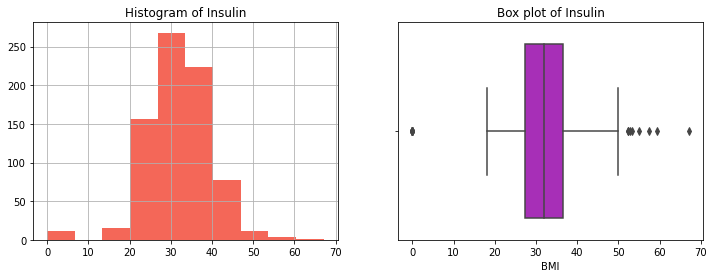

In [ ]:
# distribution of BMI
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

plt.subplot(1, 2, 1)
diabetes_df.BMI.hist(color = '#f46758')
plt.title('Histogram of Insulin')

plt.subplot(1, 2, 2)
sns.boxplot(diabetes_df.BMI, color = '#b918ce')
plt.title('Box plot of Insulin')

plt.show()

In [ ]:
# summary statistics of BMI
df_insulin = diabetes_df["BMI"]
df_insulin.describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

Note your observations.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


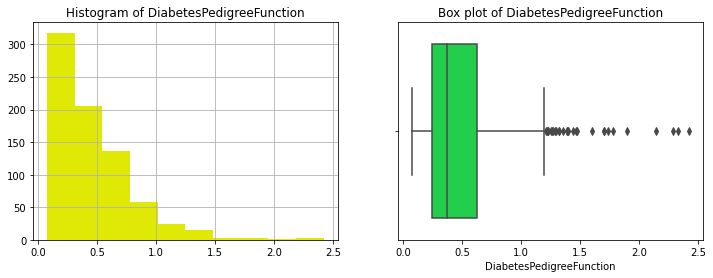

In [ ]:
# distribution of DiabetesPedigreeFunction
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

plt.subplot(1, 2, 1)
diabetes_df.DiabetesPedigreeFunction.hist(color = '#e0e806')
plt.title('Histogram of DiabetesPedigreeFunction')

plt.subplot(1, 2, 2)
sns.boxplot(diabetes_df.DiabetesPedigreeFunction, color = '#07ea3f')
plt.title('Box plot of DiabetesPedigreeFunction')

plt.show()

In [ ]:
# summary statistics of DiabetesPedigreeFunction

df_insulin = diabetes_df["DiabetesPedigreeFunction"]
df_insulin.describe()

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

Note your observations.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


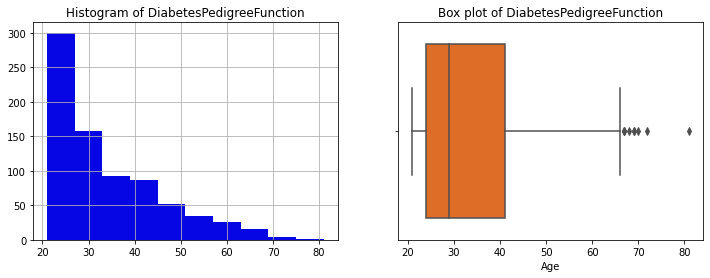

In [ ]:
# distribution of Age

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

plt.subplot(1, 2, 1)
diabetes_df.Age.hist(color = '#0606e5')
plt.title('Histogram of DiabetesPedigreeFunction')

plt.subplot(1, 2, 2)
sns.boxplot(diabetes_df.Age, color = '#fc660a')
plt.title('Box plot of DiabetesPedigreeFunction')

plt.show()

In [ ]:
# summary statistics of Age
df_insulin = diabetes_df["Age"]
df_insulin.describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

Note your observations.

In [ ]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


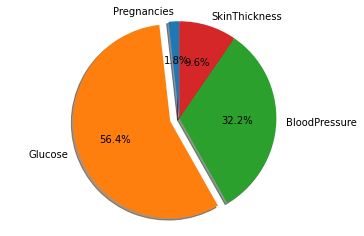

In [ ]:
# distribution of outcome - create a pie chart

import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness'
sizes = [diabetes_df["Pregnancies"].sum(), diabetes_df["Glucose"].sum(), diabetes_df["BloodPressure"].sum(), diabetes_df["SkinThickness"].sum()]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Note your observations.

### 3.2 Research-Specific Analysis

Since our research question requires us to discover the factors that determine whether a patient has diabetes or not, we will make the 'Outcome' variable our main focus during this analysis.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


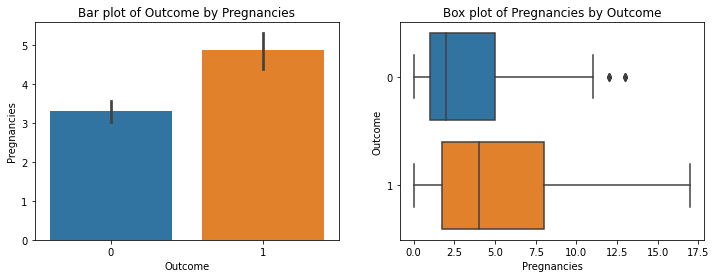

In [ ]:
# box and bar plots of Pregnancies by Outcome
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

plt.subplot(1, 2, 1)
sns.barplot(data = diabetes_df, x = 'Outcome', y = 'Pregnancies')
plt.title('Bar plot of Outcome by Pregnancies')

plt.subplot(1, 2, 2)
sns.boxplot(diabetes_df.Pregnancies, diabetes_df.Outcome, orient = 'h')
plt.title('Box plot of Pregnancies by Outcome')

plt.show()

What do you notice?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


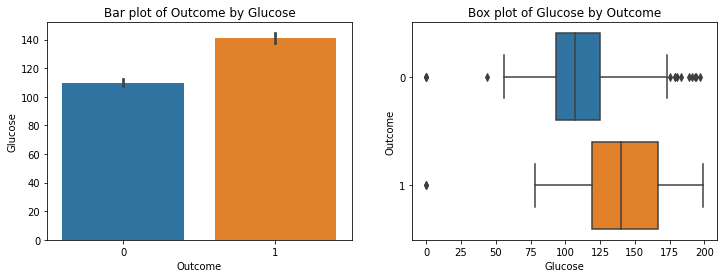

In [ ]:
# box and bar plots of Glucose by Outcome

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

plt.subplot(1, 2, 1)
sns.barplot(data = diabetes_df, x = 'Outcome', y = 'Glucose')
plt.title('Bar plot of Outcome by Glucose')

plt.subplot(1, 2, 2)
sns.boxplot(diabetes_df.Glucose, diabetes_df.Outcome, orient = 'h')
plt.title('Box plot of Glucose by Outcome')

plt.show()

Note your observartions.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


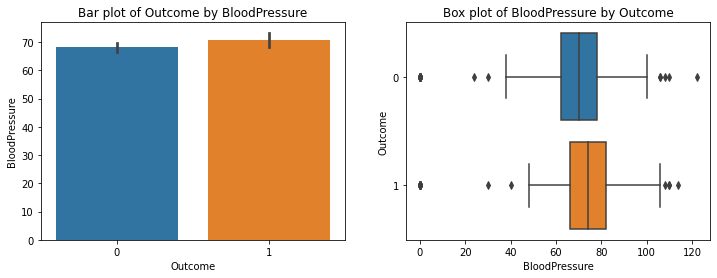

In [ ]:
# box and bar plots of BloodPressure by Outcome

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

plt.subplot(1, 2, 1)
sns.barplot(data = diabetes_df, x = 'Outcome', y = 'BloodPressure')
plt.title('Bar plot of Outcome by BloodPressure')

plt.subplot(1, 2, 2)
sns.boxplot(diabetes_df.BloodPressure, diabetes_df.Outcome, orient = 'h')
plt.title('Box plot of BloodPressure by Outcome')

plt.show()

Note your observations.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


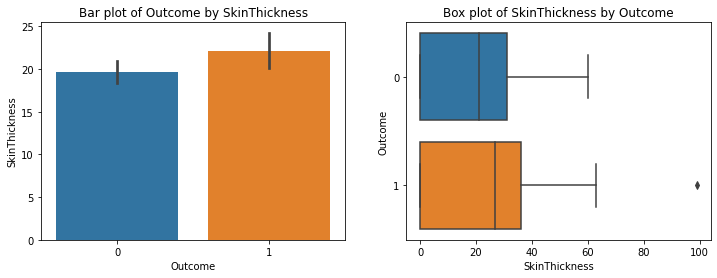

In [ ]:
# box and bar plots of SkinThickness by Outcome

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

plt.subplot(1, 2, 1)
sns.barplot(data = diabetes_df, x = 'Outcome', y = 'SkinThickness')
plt.title('Bar plot of Outcome by SkinThickness')

plt.subplot(1, 2, 2)
sns.boxplot(diabetes_df.SkinThickness, diabetes_df.Outcome, orient = 'h')
plt.title('Box plot of SkinThickness by Outcome')

plt.show()

Note your observations.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


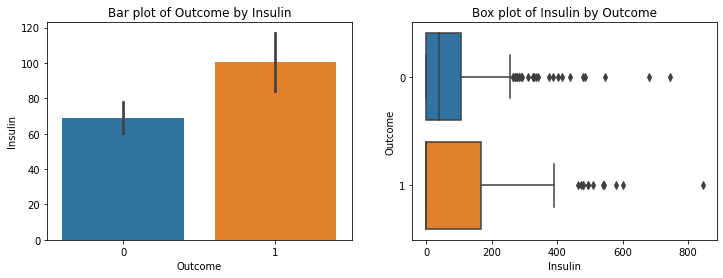

In [ ]:
# box and bar plots of Insulin by Outcome

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

plt.subplot(1, 2, 1)
sns.barplot(data = diabetes_df, x = 'Outcome', y = 'Insulin')
plt.title('Bar plot of Outcome by Insulin')

plt.subplot(1, 2, 2)
sns.boxplot(diabetes_df.Insulin, diabetes_df.Outcome, orient = 'h')
plt.title('Box plot of Insulin by Outcome')

plt.show()

Note your observations.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


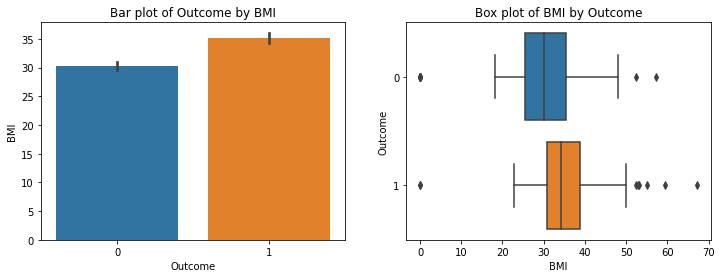

In [ ]:
# box and bar plots of BMI by Outcome

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

plt.subplot(1, 2, 1)
sns.barplot(data = diabetes_df, x = 'Outcome', y = 'BMI')
plt.title('Bar plot of Outcome by BMI')

plt.subplot(1, 2, 2)
sns.boxplot(diabetes_df.BMI, diabetes_df.Outcome, orient = 'h')
plt.title('Box plot of BMI by Outcome')

plt.show()

Note your observations.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


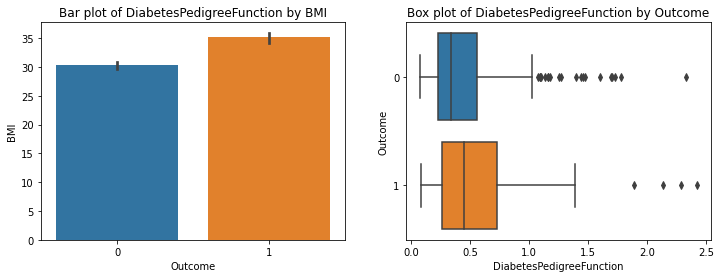

In [ ]:
# box and bar plots of DiabetesPedigreeFunction by Outcome

# HINT: use the code used for Pregnancies
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

plt.subplot(1, 2, 1)
sns.barplot(data = diabetes_df, x = 'Outcome', y = 'BMI')
plt.title('Bar plot of DiabetesPedigreeFunction by BMI')

plt.subplot(1, 2, 2)
sns.boxplot(diabetes_df.DiabetesPedigreeFunction, diabetes_df.Outcome, orient = 'h')
plt.title('Box plot of DiabetesPedigreeFunction by Outcome')

plt.show()

Note your observations.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


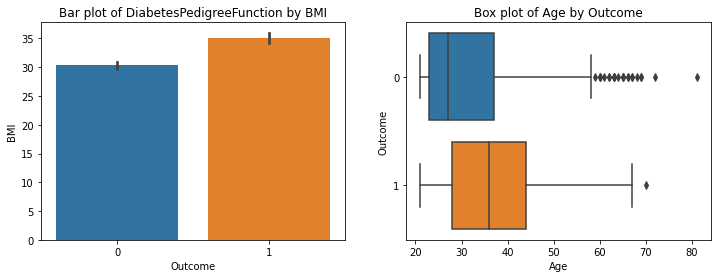

In [ ]:
# box and bar plots of Age by Outcome

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

plt.subplot(1, 2, 1)
sns.barplot(data = diabetes_df, x = 'Outcome', y = 'BMI')
plt.title('Bar plot of DiabetesPedigreeFunction by BMI')

plt.subplot(1, 2, 2)
sns.boxplot(diabetes_df.Age, diabetes_df.Outcome, orient = 'h')
plt.title('Box plot of Age by Outcome')

plt.show()

Note your observations.

## <font color='#2F4F4F'>4. Summary of Findings</font>

Interpret and summarize the findings of your analysis.

## <font color='#2F4F4F'>5. Recommendations</font>

What would you recommend the NGO Hospital to do based on the findings of your analysis?

## <font color='#2F4F4F'>6. Challenging your Solution</font>

### a) Did we have the right data?


### b) Did we have the right question?

